# El efecto Magnus

**Objetivo general**
- Entender en qué consiste el effecto Magnus.

**Objetivos particulares**
- Explicar de manera simple la física del effecto Magnus.
- Realizar un algoritmo para implementar un modelo simple de este efecto.

## Contenido
- [1 - Introducción.](#1)
- [2 - Interactivo.](#2)
- [3 - Comportamiento de un cilindro en un flujo.](#3)
    - [3.1 - Parámetros físicos.](#3-1)
    - [3.2 - Parámetros numéricos.](#3-2)
    - [3.3 - Flujo libre.](#3-3)
    - [3.4 - Un cilindro.](#3-4)
    - [3.5 - Velocidad y función de corriente ($\psi$).](#3-5)
    - [3.6 - Principio de superposición.](#3-6)
    - [3.7 - Agregando rotación.](#3-7)
- [Ejercicios.](#4)
    - [Ejercicio 1. Cuatro cilindros.](#ej-1)

<a name="1"></a>
## Introducción
El efecto Magnus fue descrito por primera vez en 1853 por el físico y químico alemán [Heinrich Gustav Magnus](https://es.wikipedia.org/wiki/Heinrich_Magnus) (1802-1870). En este fenómeno físico la rotación de un objeto afecta su propia trayectoria a través de un fluido. 

<table>
  <tr>
    <td><img src = "https://aaiiuc3m.files.wordpress.com/2009/03/efecto1.jpg" width=200px></td>
    <td><img src = "https://aaiiuc3m.files.wordpress.com/2009/03/efecto2.jpg" width=200px></td>
  </tr>
</table>

Referencia: Carrasc0, F. (Publicado el marzo 18, 2009). Efecto Magnus. AAIIUC3M: *the world through engineers' eyes* . https://aaiiuc3m.wordpress.com/2009/03/18/efecto-magnus/.

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/2OSrvzNW9FE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/dcvuVlWvc8E?start=50" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from magnus_lib import plotGrid

print(np.__name__, np.__version__)
print(plt.matplotlib.__name__, plt.matplotlib.__version__)

numpy 1.24.2
matplotlib 3.7.1


<a name="2"></a>
## Interactivo
En el siguiente interactivo Ud. puede ver el efecto Magnus para un cilindro en rotación en un fluido.

In [1]:
%run "cilindros_rotando.ipynb"

Output()

<a name="3"></a>
## Comportamiento de un cilindro en un flujo.

Vamos a estudiar el efecto Magnus usando como ejemplo un cilindro, con y sin rotación, inmerso en un flujo libre. Seguiremos los pasos siguientes:

<a name="3-1"></a>
### Paso 1. Definición de algunos parámetros físicos.

In [2]:
𝑢_inf = 0.6  # Velocidad del flujo libre
𝜅 = 0.25     # Intensidad del doblete
𝜋 = np.pi

# Dimensiones del dominio
x_start, x_end = -2.0, 2.0  
y_start, y_end = -1.0, 1.0 

<a name="3-2"></a>
### Paso 2. Definición de algunos parámetros numéricos

In [15]:
N = 20                               # Número de puntos discretos
x = np.linspace(x_start, x_end, N)    # Arreglo 1D en x
y = np.linspace(y_start, y_end, 4*N)    # Arreglo 1D en y
xg, yg = np.meshgrid(x, y)            # Malla del dominio
size = 10                             # Tamaño de la figura

<a name="3-3"></a>
### Paso 3. Cálculo y graficación del flujo libre

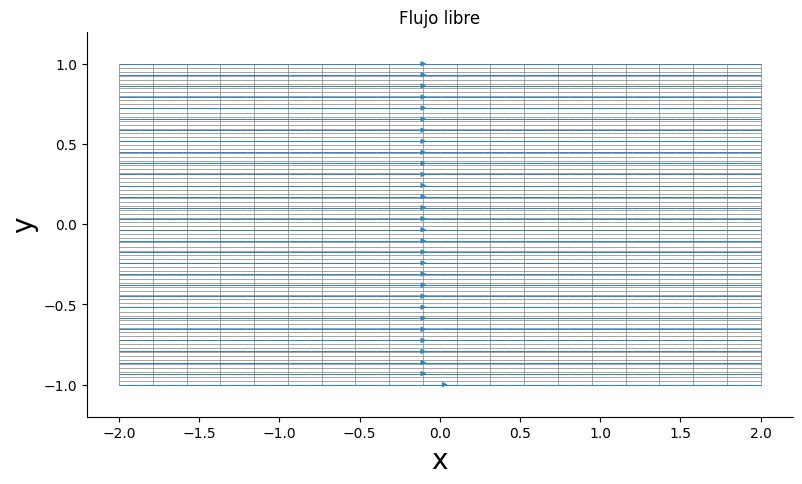

(80, 20) (80, 20) (80, 20) (80, 20)


In [19]:
# Componentes de la velocidad del flujo libre
u_flujo_libre = u_inf * np.ones((4*N, N), dtype=float)
v_flujo_libre = np.zeros((4*N, N), dtype=float)

# Función de corriente del flujo libre
psi_flujo_libre = 𝑢_inf * yg 

# Initialización de la figura
ax = plotGrid(x, y, size,'grid')

# Dibujamos las líneas de corriente
ax.streamplot(xg, yg, u_flujo_libre, v_flujo_libre, density=1, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)
ax.set_title('Flujo libre')
plt.show()

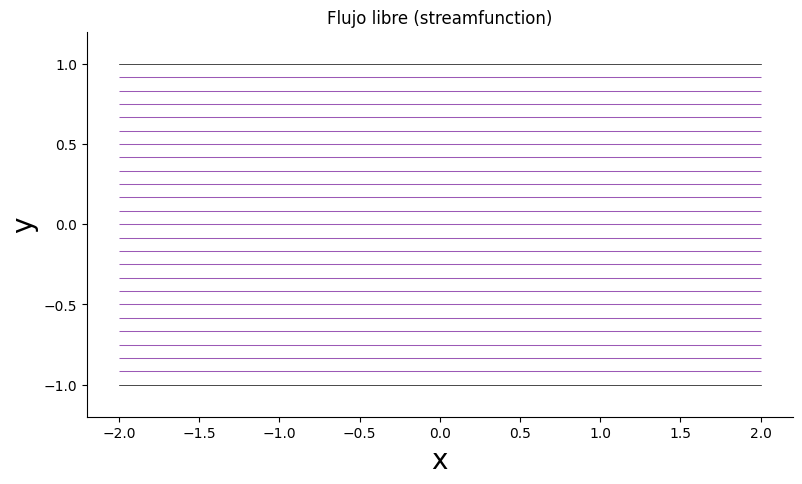

In [7]:
# Initialización de la figura
ax = plotGrid(x, y, size,'topdown')

# Dibujamos las líneas de corriente
plt.contour(xg, yg, psi_flujo_libre, levels=25, colors='#9b59b6', linewidths=0.75, linestyles='solid')
ax.set_title('Flujo libre (streamfunction)')
plt.show()

<a name="3-4"></a>
### Paso 4. Ubicación de un cilindro dentro del dominio

Las coordenadas del centro las calculamos con la siguiente fórmula:
$$
(x_{d1}, y_{d1}) = (A * \cos(\alpha + \pi), A * \sin(\alpha + \pi))
$$
y el radio con la siguiente:
$$
R = \sqrt{\frac{\kappa}{4\pi u_{\infty}}}
$$

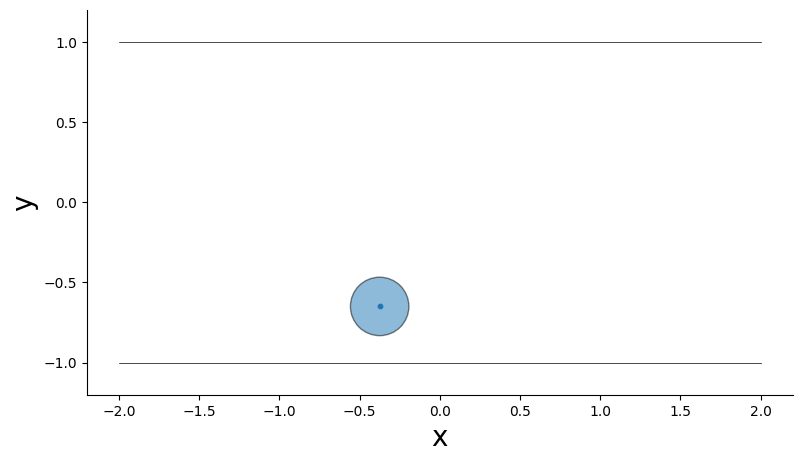

In [9]:
# Definición del cilindro
𝛼 = 𝜋 / 3.0
A = 0.75
x_d1, y_d1 = A * np.cos(𝛼 + 𝜋), A * np.sin(𝛼 + 𝜋) # Coordenadas del centro
R = np.sqrt(𝜅 / (4 * 𝜋 * 𝑢_inf))                  # Radio

# Initialización de la figura
ax = plotGrid(x, y, size,frame='topdown')

# Dibujamos el cilindro
ax.scatter(x_d1, y_d1, s=10) # cylinder 1
circle1 = plt.Circle((x_d1, y_d1), radius=R, fc='C0', ec='k', alpha=0.5)
ax.add_patch(circle1)

plt.show()

Debido a que estaremos dibujando cilindros constantemente, definimos la siguiente función:

In [10]:
def plot_cylinder(x_d, y_d, R, color = 'C0'):
    plt.scatter(x_d, y_d, s=10, c='k')
    circle = plt.Circle((x_d, y_d), radius=R, fc=color, ec='k', alpha=0.25)
    plt.gca().add_patch(circle)
    return circle

<a name="3-5"></a>
### Paso 5. Cálculo de la velocidad y función de corriente

La velocidad de un doblete ubicado en el centro del cilindro se calcula como sigue:
$$
u\left(x,y\right) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{(x-x_{d1})^2-(y-y_{d1})^2}{\left((x-x_{d1})^2+(y-y_{d1})^2\right)^2}
$$
$$
v\left(x,y\right) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2(x-x_{d1})(y-y_{d1})}{\left((x-x_{d1})^2+(y-y_{d1})^2\right)^2}
$$ 

In [11]:
def get_velocity_doublet(𝜅, xd, yd, xg, yg):
    """Returns the velocity field generated by a doublet.
    
    Arguments
    ---------
    𝜅 -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    u = - 𝜅 /(2 * 𝜋) *((xg-xd)**2-(yg-yd)**2) / ((xg-xd)**2+(yg-yd)**2)**2
    v = - 𝜅 /(2 * 𝜋) * 2*(xg-xd)*(yg-yd) / ((xg-xd)**2+(yg-yd)**2)**2
    
    return u, v

$$
\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{(y-y_{d1})}{(x-x_{d1})^2+(y-y_{d1})^2}
$$

In [12]:
def get_stream_function_doublet(strength, xd, yd, xg, yg):
    """Returns the stream-function generated by a doublet.
    
    Arguments
    ---------
    strength -- strength of the doublet.
    xd, yd -- coordinates of the doublet.
    X, Y -- mesh grid.
    """
    psi = - strength/(2*np.pi)*(yg-yd)/((xg-xd)**2+(yg-yd)**2)
    
    return psi

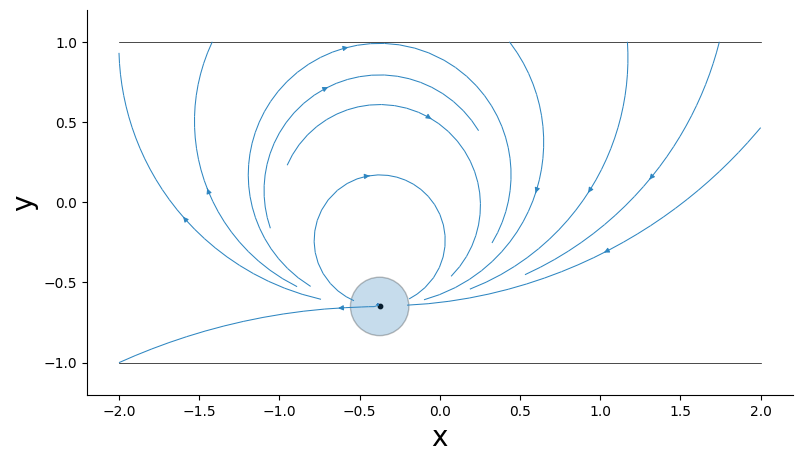

In [13]:
# Cálculamos la velocidad sobre los puntos de la malla.
u_d1, v_d1 = get_velocity_doublet(𝜅, x_d1, y_d1, xg, yg)

# Initialización de la figura
ax = plotGrid(x, y, size,'topdown')

# Dibujamos el cilindro
plot_cylinder(x_d1, y_d1, R)

# Líneas de corriente
ax.streamplot(xg, yg, u_d1, v_d1, density=1, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)

plt.show()

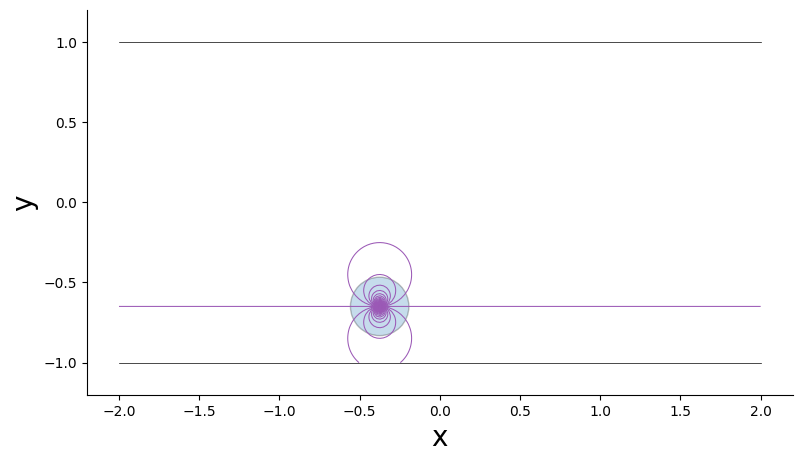

In [14]:
# Calcula la función de corriente sobre la malla
psi_d1 = get_stream_function_doublet(𝜅, x_d1, y_d1, xg, yg)

# Initialización de la figura
ax = plotGrid(x, y, size,'topdown')

# Dibujamos el cilindro
plot_cylinder(x_d1, y_d1, R)

# Líneas de corriente
ax.contour(xg, yg, psi_d1, levels=100, colors='#9b59b6', linewidths=0.75, linestyles='solid')

plt.show()

<a name="3-6"></a>
### Paso 6. Principio de superposición

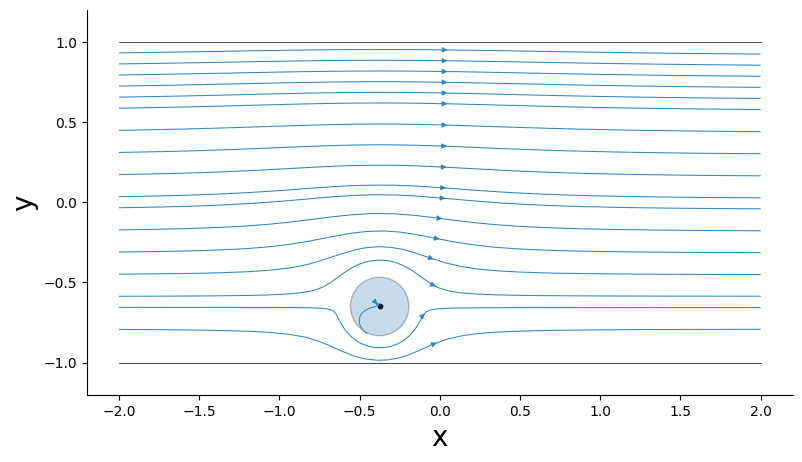

In [15]:
# Superposición del flujo del doblete con el flujo libre

# Componentes de la velocidad
u1 = u_flujo_libre + u_d1
v1 = v_flujo_libre + v_d1

# Función de corriente
psi1 = psi_flujo_libre + psi_d1

# Initialización de la figura
ax = plotGrid(x, y, size,'topdown')

# Dibujamos el cilindro
plot_cylinder(x_d1, y_d1, R)

# Líneas de corriente
ax.streamplot(xg, yg, u1, v1, density=1, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)

plt.show()

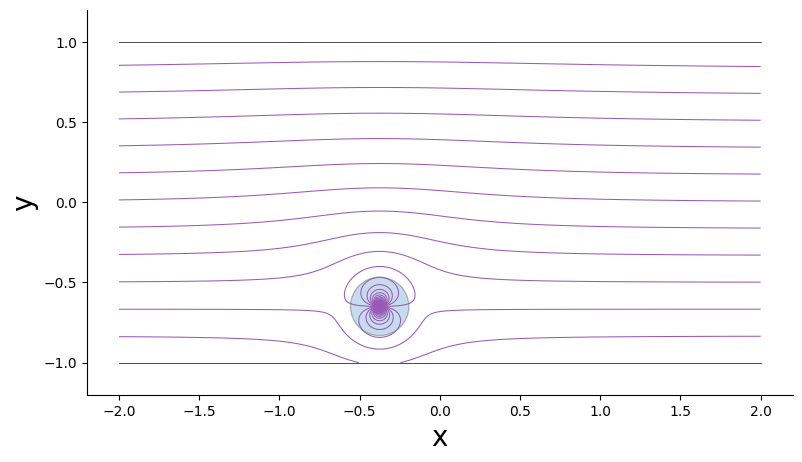

In [16]:
# Initialización de la figura
ax = plotGrid(x, y, size,'topdown')

# Dibujamos el cilindro
plot_cylinder(x_d1, y_d1, R)

# Líneas de corriente
ax.contour(xg, yg, psi1, levels=100, colors='#9b59b6', linewidths=0.75, linestyles='solid')

plt.show()

<a name="3-7"></a>
### Paso 7. Agregamos rotación

$$u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2} \qquad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}$$ 

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left(x^2+y^2\right)$$



In [17]:
def get_velocity_vortex(Γ, xv, yv, xg, yg):
    """Returns the velocity field generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    u = + Γ/(2*𝜋)*(yg-yv)/((xg-xv)**2+(yg-yv)**2)
    v = - Γ/(2*𝜋)*(xg-xv)/((xg-xv)**2+(yg-yv)**2)
    return u, v

def get_stream_function_vortex(Γ, xv, yv, xg, yg):
    """Returns the stream-function generated by a vortex.
    
    Arguments
    ---------
    strength -- strength of the vortex.
    xv, yv -- coordinates of the vortex.
    X, Y -- mesh grid.
    """
    psi = Γ/(4*𝜋)*np.log((xg-xv)**2+(yg-yv)**2)
    
    return psi

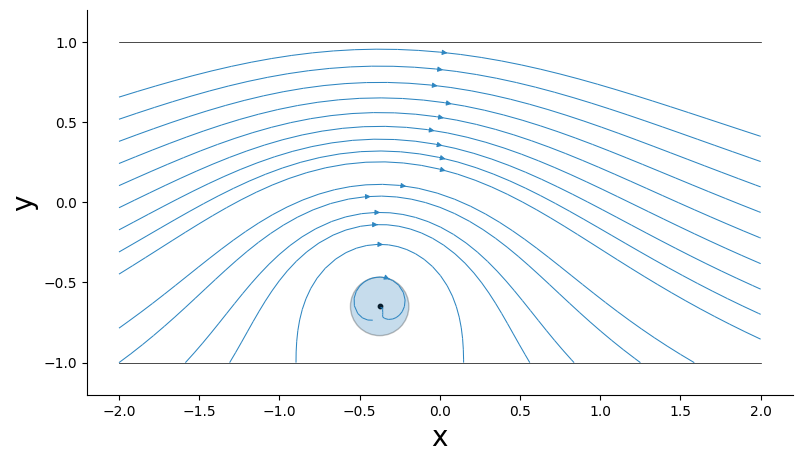

In [18]:
Γ1 = 4.0
# Cálculamos la velocidad sobre los puntos de la malla.
u_v1, v_v1 = get_velocity_vortex(Γ1, x_d1, y_d1, xg, yg)

# Calcula la función de corriente sobre la malla
psi_v1 = get_stream_function_vortex(Γ1, x_d1, y_d1, xg, yg)

# Superposición del doblete y la rotación con el flujo libre
u1 = u_flujo_libre + u_d1 + u_v1
v1 = v_flujo_libre + v_d1 + v_v1
psi1 = psi_flujo_libre + psi_v1

# Initialization of figure
ax = plotGrid(x, y, size,'topdown')
plot_cylinder(x_d1, y_d1, R)   # cylinder 1
ax.streamplot(xg, yg, u1, v1, density=1, linewidth=0.75, color='#2e86c1', arrowsize=0.75, minlength=0.8)
plt.show()

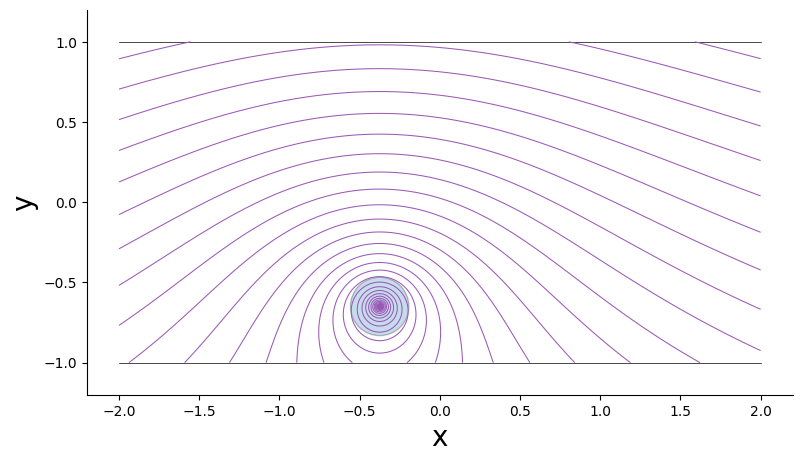

In [19]:
# Initialization of figure
ax = plotGrid(x, y, size,'topdown')
plot_cylinder(x_d1, y_d1, R)   # cylinder 1
ax.contour(xg, yg, psi1, levels=50, colors='#9b59b6', linewidths=0.75, linestyles='solid')
plt.show()

<a name="4"></a>
## Ejercicios.

---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 1. Repetir el proceso con 4 cilindros.</font>**

<font color="DarkBlue">Con base en lo realizado en la sección anterior, repita el proceso pero ahora agregando 4 cilindros en las siguiente posiciones:
* Primer cilindro: $(x,y) = (A * \cos(\alpha + \pi), A * \sin(\alpha + \pi))$.
* Segundo cilindro: $(x,y) = (A * \cos(\alpha + \pi/2), A * \sin(\alpha+\pi/2))$.
* Tercer cilindro: $(x,y) = (A * \cos(\alpha), A * \sin(\alpha))$.
* Cuarto cilindro: $(x,y) = (A * \cos(\alpha - \pi/2), A * \sin(\alpha-\pi/2))$.

Agregue rotación a los cuatro cilindros en sentido horario. Utilice $\alpha = 0$, $\Gamma = 4.0$ y $A = 0.75$
    
Utilice el código de la celda siguiente en donde se hace la simulación para dos cilindros.</font>

---

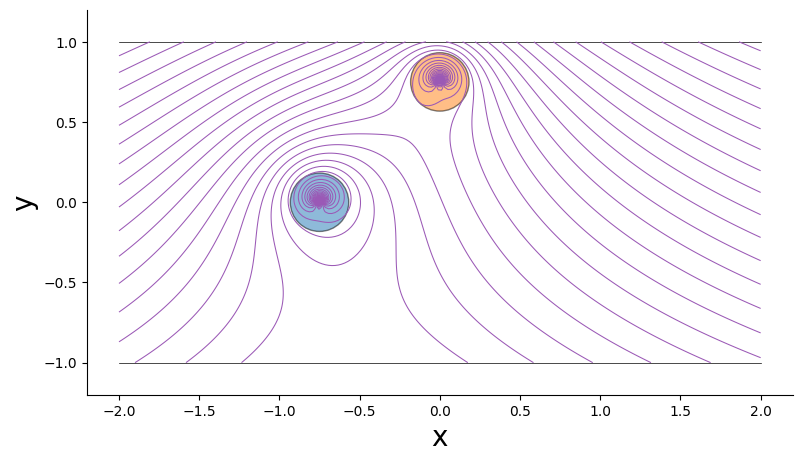

In [20]:
def cylinder_definition(𝛼):
    xd1, yd1 = 0.75 * np.cos(𝛼 + 𝜋), 0.75 * np.sin(𝛼 + 𝜋)
    xd2, yd2 = 0.75 * np.cos(𝛼 + 𝜋/2), 0.75 * np.sin(𝛼 + 𝜋/2)
    return [(xd1, yd1), (xd2, yd2)]

def stream_function(𝛼, 𝜅, Γ, xg, yg):
    cc = cylinder_definition(𝛼)
    p1 = psi_flujo_libre + get_stream_function_doublet(𝜅, cc[0][0], cc[0][1], xg, yg)
    p2 = psi_flujo_libre + get_stream_function_doublet(𝜅, cc[1][0], cc[1][1], xg, yg)
    p1_v = get_stream_function_vortex(Γ, cc[0][0], cc[0][1], xg, yg)
    p2_v = get_stream_function_vortex(Γ, cc[1][0], cc[1][1], xg, yg)
    s_f = p1+p1_v + p2+p2_v
    
    return s_f

𝛼 = 0
Γ= 4.0

center = cylinder_definition(𝛼)
s_f = stream_function(𝛼, 𝜅, Γ, xg, yg)

# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

circ1 = plt.Circle(center[0], radius=R, fc='C0', ec='k', alpha=0.5)
circ2 = plt.Circle(center[1], radius=R, fc='C1', ec='k', alpha=0.5)
ax.add_patch(circ1)
ax.add_patch(circ2)
con = ax.contour(xg, yg, s_f, levels=100, colors='#9b59b6', linewidths=0.75, linestyles='solid')

plt.show()

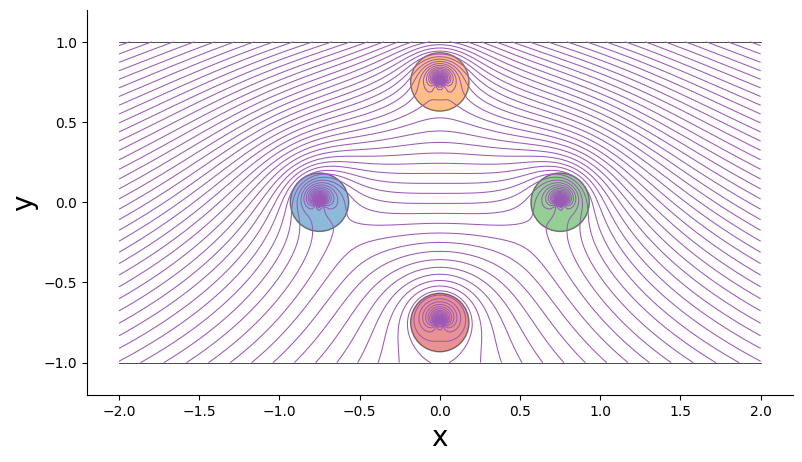

In [21]:
# HINT: copie el código de la celda de arriba y agregue lo correspondiente para 
#       los dos cilindros restantes.Cambie el nombre a las funciones cylinder_definition
#       stream_function agregándoles el número cuatro: cylinder_definition4(), 
#       stream_function4()
#
### BEGIN SOLUTION
def cylinder_definition4(𝛼):
    xd1, yd1 = 0.75 * np.cos(𝛼 + 𝜋), 0.75 * np.sin(𝛼 + 𝜋)
    xd2, yd2 = 0.75 * np.cos(𝛼 + 𝜋/2), 0.75 * np.sin(𝛼 + 𝜋/2)
    xd3, yd3 = 0.75 * np.cos(𝛼), 0.75 * np.sin(𝛼)     
    xd4, yd4 = 0.75 * np.cos(𝛼 - 𝜋/2), 0.75 * np.sin(𝛼 - 𝜋/2)
    return [(xd1, yd1), (xd2, yd2), (xd3, yd3), (xd4, yd4)]

def stream_function4(𝛼, 𝜅, Γ, xg, yg):
    cc = cylinder_definition4(𝛼)
    p1 = psi_flujo_libre + get_stream_function_doublet(𝜅, cc[0][0], cc[0][1], xg, yg)
    p2 = psi_flujo_libre + get_stream_function_doublet(𝜅, cc[1][0], cc[1][1], xg, yg)
    p3 = psi_flujo_libre + get_stream_function_doublet(𝜅, cc[2][0], cc[2][1], xg, yg)
    p4 = psi_flujo_libre + get_stream_function_doublet(𝜅, cc[3][0], cc[3][1], xg, yg)
    p1_v = get_stream_function_vortex(Γ, cc[0][0], cc[0][1], xg, yg)
    p2_v = get_stream_function_vortex(Γ, cc[1][0], cc[1][1], xg, yg)
    p3_v = get_stream_function_vortex(Γ, cc[2][0], cc[2][1], xg, yg)
    p4_v = get_stream_function_vortex(Γ, cc[3][0], cc[3][1], xg, yg)
    
    s_f = p1+p1_v + p2+p2_v + p3+p3_v + p4+p4_v
    
    return s_f

𝛼 = 0
Γ= 4.0

center = cylinder_definition4(𝛼)
s_f = stream_function4(𝛼, 𝜅, Γ, xg, yg)

# Initialization of figure
ax = plotGrid(x, y, size,'topdown')

circ1 = plt.Circle(center[0], radius=R, fc='C0', ec='k', alpha=0.5)
circ2 = plt.Circle(center[1], radius=R, fc='C1', ec='k', alpha=0.5)
circ3 = plt.Circle(center[2], radius=R, fc='C2', ec='k', alpha=0.5)
circ4 = plt.Circle(center[3], radius=R, fc='C3', ec='k', alpha=0.5)

ax.add_patch(circ1)
ax.add_patch(circ2)
ax.add_patch(circ3)
ax.add_patch(circ4)
con = ax.contour(xg, yg, s_f, levels=100, colors='#9b59b6', linewidths=0.75, linestyles='solid')

plt.show()
### END SOLUTION